In [13]:
#pip installed all modules to my desktop
import sep
import astropy as ap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [14]:
rcParams['figure.figsize'] = [10., 8.]

In [15]:
# read image into standard 2-d numpy array
data = .read("/Users/kaitlyn/Desktop/School/Winter_2024/Coding/Final/image.fits")

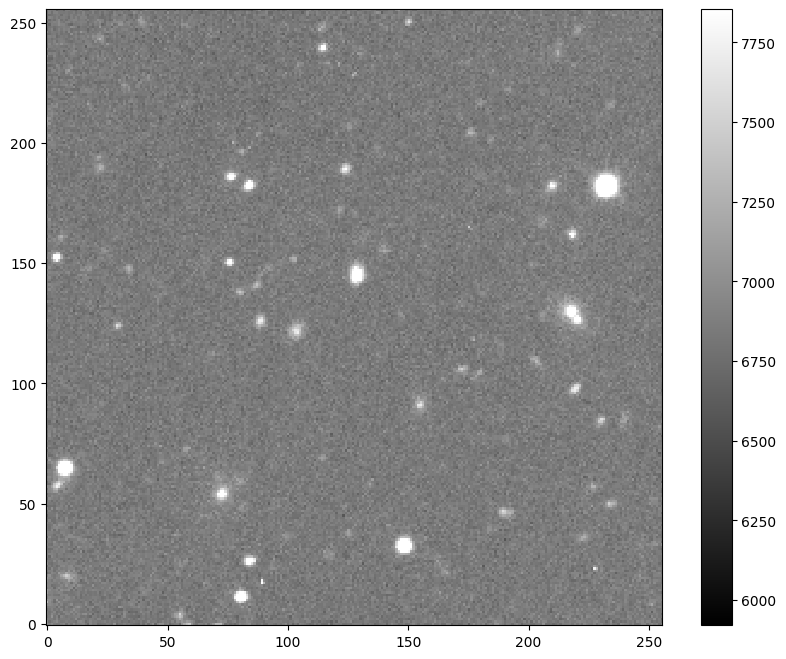

In [16]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [17]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [18]:
mask = np.ones_like(data, dtype=bool)
bkg = sep.Background(data, mask=mask, bw=64, bh=64, fw=3, fh=3)

In [19]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
1.0


In [20]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

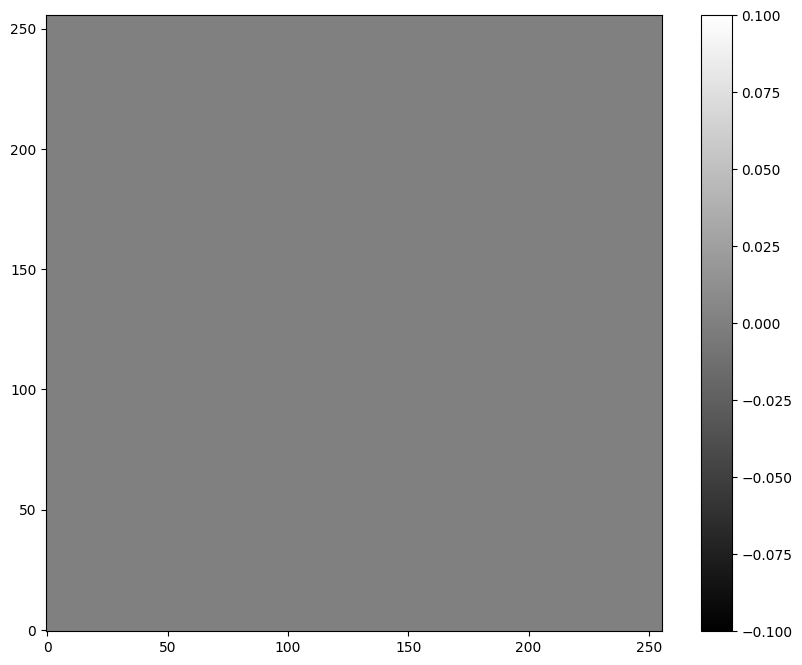

In [21]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [22]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

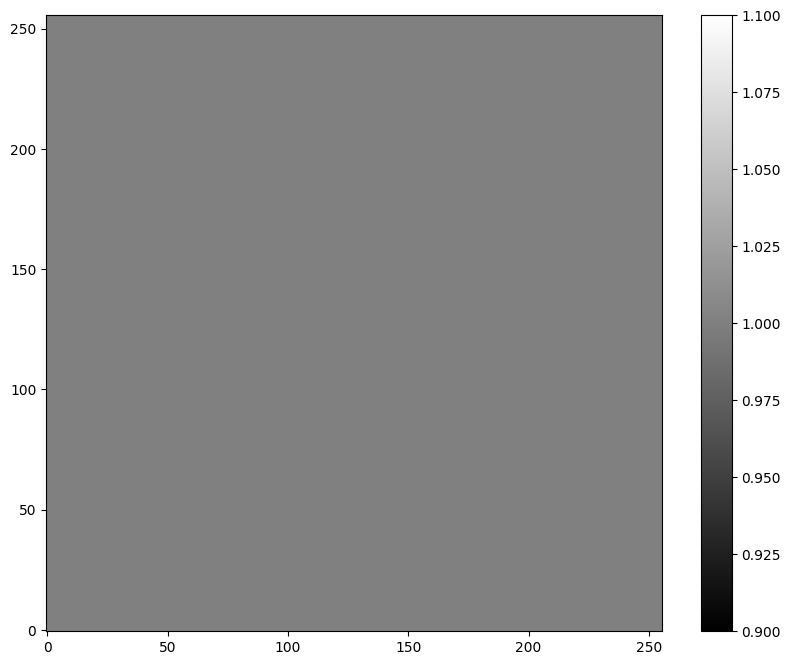

In [23]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [24]:
# subtract the background
data_sub = data - bkg

In [25]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [26]:
# how many objects were detected
len(objects)

1

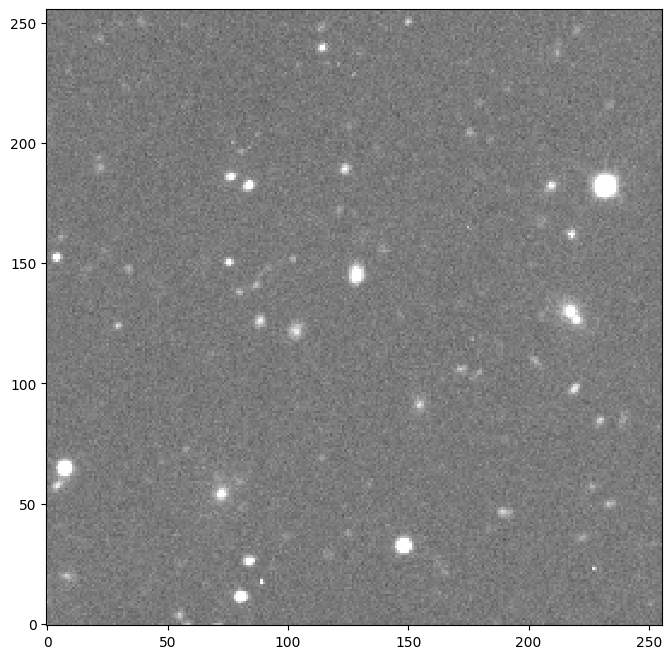

In [27]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)